In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pydicom
import skimage
import matplotlib.pyplot as plt

#### First, read in your dataframe of images with bounding box coordinates

In [2]:
bbox = pd.read_csv('bounding_boxes.csv')
bbox

,Unnamed: 0,Image Index,Finding Label,Bbox [x,y,w,h]
0,583,dicom_00023075_033.dcm,Mass,239.502222,535.077934,72.817778,65.991111
1,584,dicom_00029579_005.dcm,Mass,609.280000,189.193490,73.955556,71.680000
2,585,dicom_00013659_019.dcm,Mass,559.217778,167.575712,102.400000,136.533333


#### For each of the three DICOM files listed in the dataframe, do the following: 
1. Read the DICOM's pixel_array attribute into a dataframe using the pydicom.dcmread function
2. Visualize the image using plt.imshow
3. Plot a histogram of the image pixel intensity values
4. Find the mean and standard deviation of intensity values of the image, and standardize it using the standardization formula:
```test
(X - X_mean)/X_std_dev
```

5. Re-plot a histogram of the normalized intensity values
6. Use the coordinates in the dataframe that tell the starting x & y values, and the width and height of the mass to plot visualize only the mass using plt.imshow
7. Plot a histogram of the normalized intensity values of the mass

In [62]:
bbox["x"] = bbox["Bbox [x"]
bbox["h"] = bbox["h]"]

In [10]:
for im in bbox["Image Index"]:
    print(im)

dicom_00023075_033.dcm
dicom_00029579_005.dcm
dicom_00013659_019.dcm


In [17]:
bbox.iloc[0]["Image Index"]

'dicom_00023075_033.dcm'

In [45]:
dicom = pydicom.dcmread(bbox.iloc[0]["Image Index"])

In [46]:
dir(dicom)

['BitsAllocated',
 'BitsStored',
 'Columns',
 'HighBit',
 'Modality',
 'PatientAge',
 'PatientID',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesInstanceUID',
 'StudyDescription',
 'StudyInstanceUID',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_character_set',
 '_convert_pixel_data_using_handler',
 '_convert_pixel_data_without_handler',
 '_dataset_slice',
 '_do_pixel_data_conversion',
 '_pretty_str',
 '_slice_dataset',
 'add',
 'add_new',
 'clear',
 'convert_pixel_data',
 'copy',
 'data_elem

In [47]:
im = dicom.pixel_array

In [49]:
type(im), im.dtype, im.shape

(numpy.ndarray, dtype('uint8'), (1024, 1024))

<IPython.core.display.Javascript object>


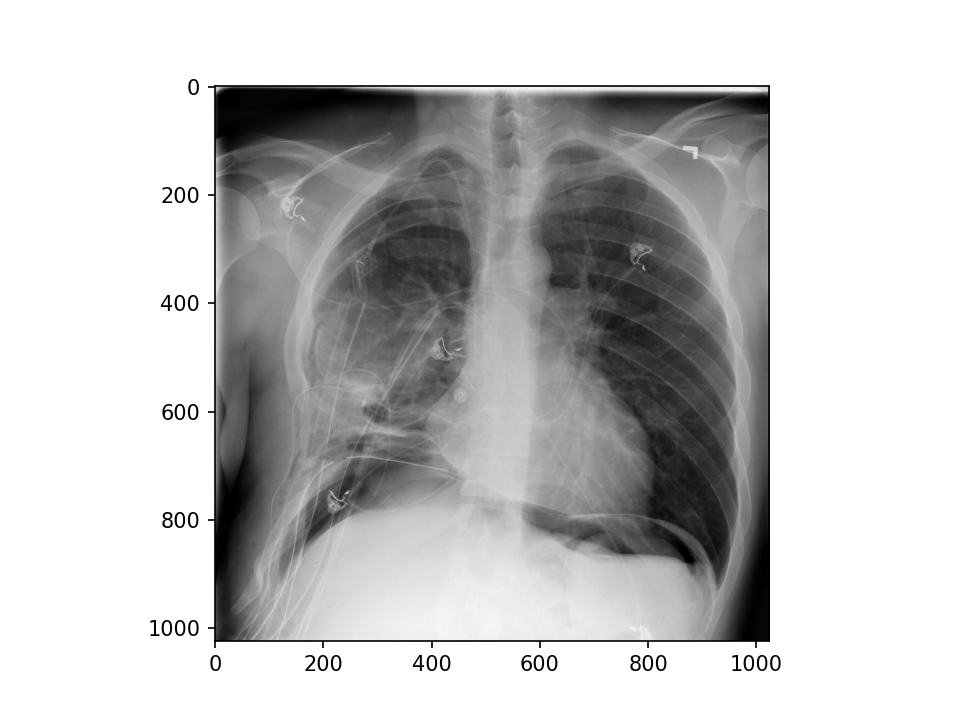

In [55]:
plt.figure()
plt.imshow(im, 'gray');

<IPython.core.display.Javascript object>


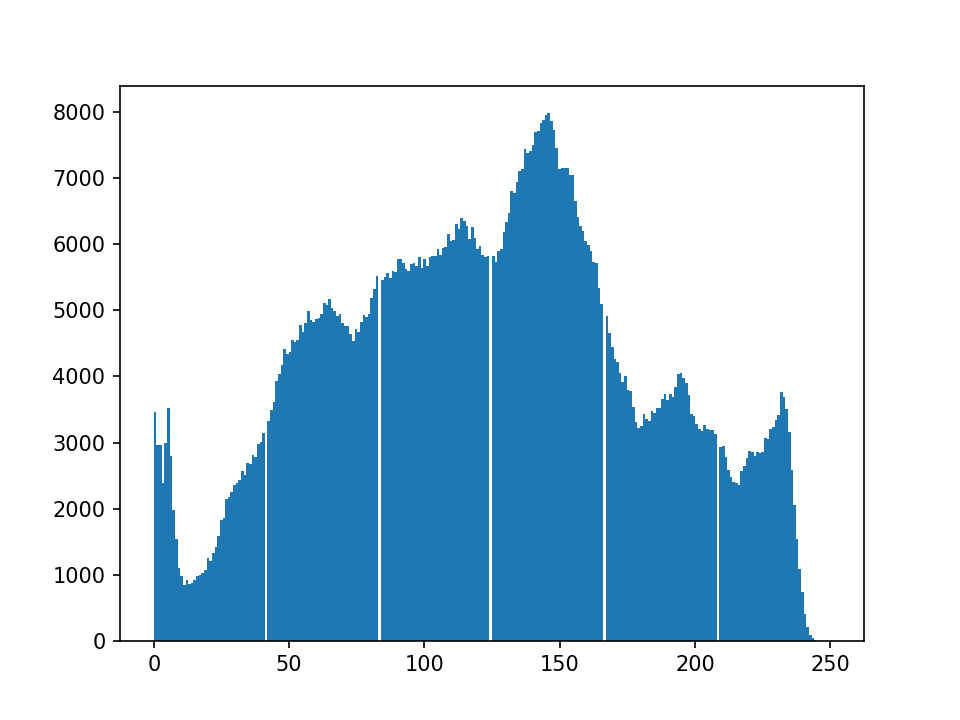

In [51]:
plt.figure()
plt.hist(im.ravel(), bins=256);

In [53]:
im.mean(), im.std()

(123.25588417053223, 57.47256019573095)

In [57]:
im_norm = (im - im.mean())/im.std()

<IPython.core.display.Javascript object>


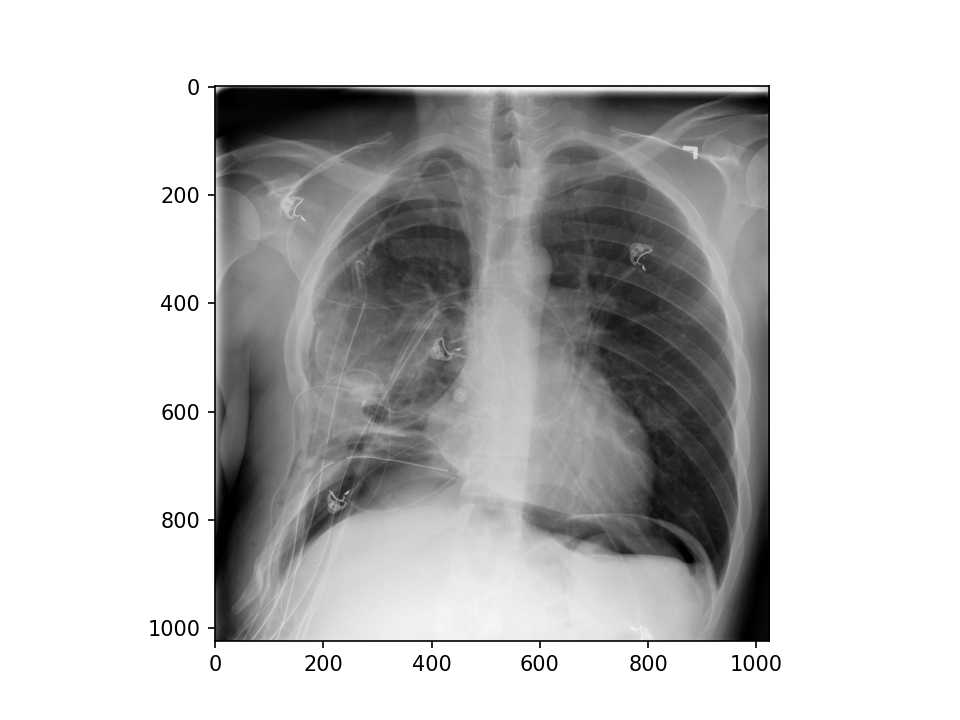

In [58]:
plt.figure()
plt.imshow(im_norm, 'gray');

<IPython.core.display.Javascript object>


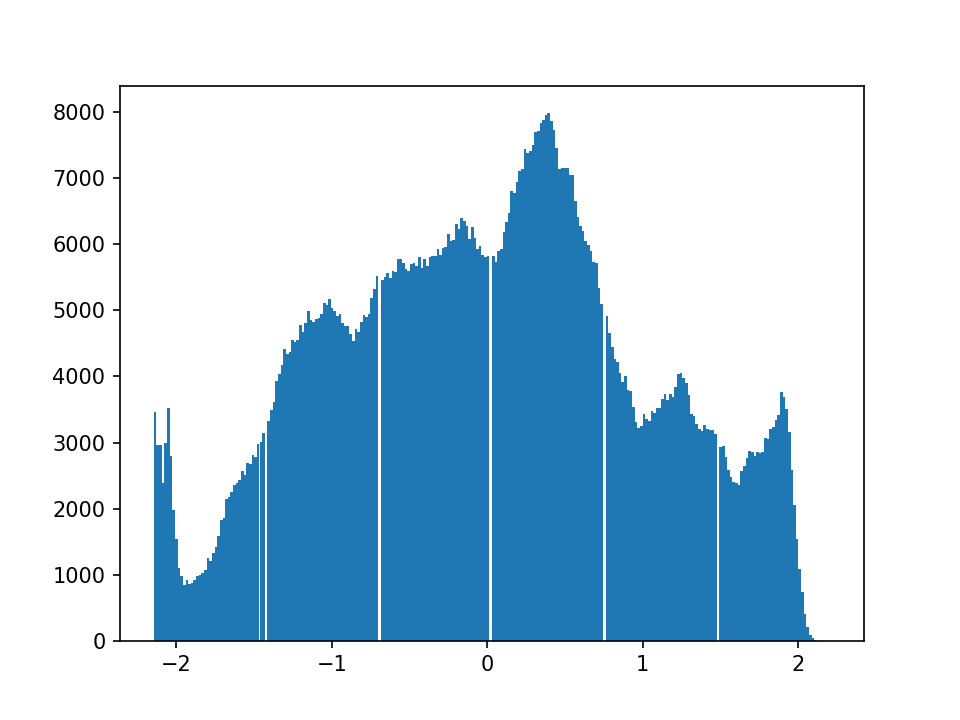

In [59]:
plt.figure()
plt.hist(im_norm.ravel(), bins=256);

In [65]:
x, y, w, h = bbox.iloc[0]["x"], bbox.iloc[0]["y"], bbox.iloc[0]["w"], bbox.iloc[0]["h"]
x, y, w, h = int(x), int(y), int(w), int(h)
x, y, w, h

(239, 535, 72, 65)

In [68]:
from matplotlib.patches import Rectangle

<IPython.core.display.Javascript object>


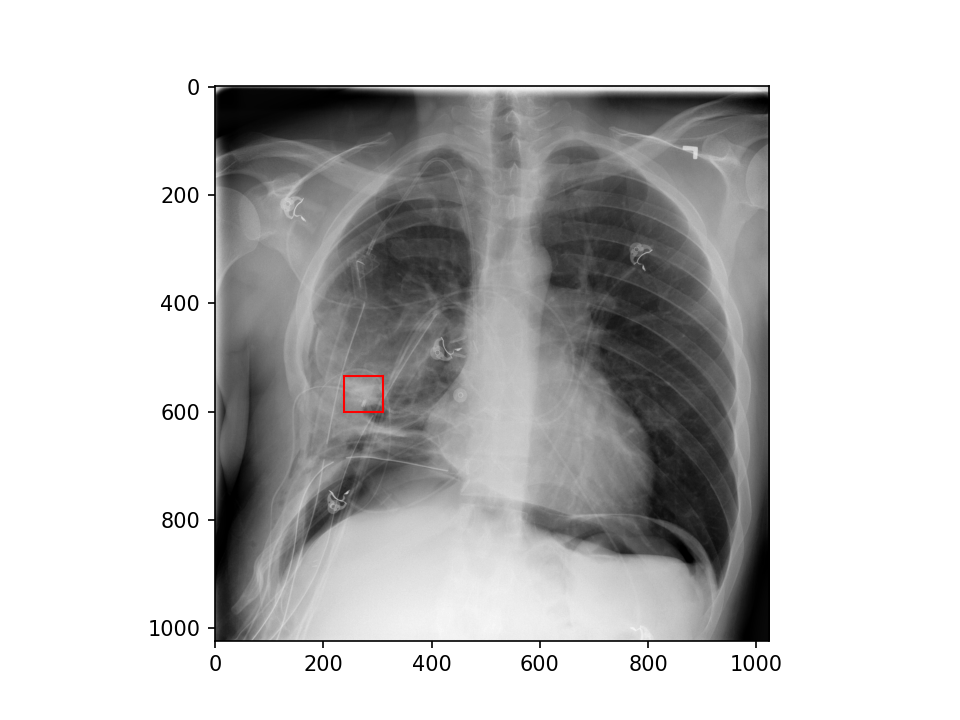

In [71]:
plt.figure()
plt.imshow(im, 'gray');
plt.gca().add_patch(
    Rectangle(
        (x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
);

<IPython.core.display.Javascript object>


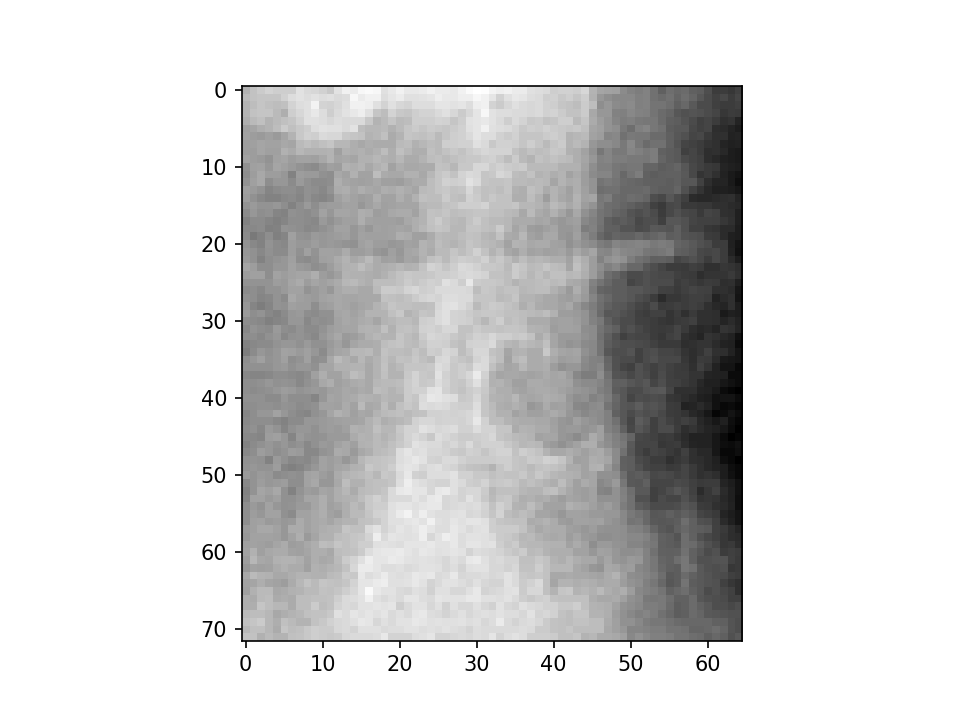

In [67]:
plt.figure()
plt.imshow(im[x:x+w, y:y+h], 'gray');